In [1]:
import gym
import random
import math
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from collections import deque
import matplotlib.pyplot as plt

In [26]:
EPISODES = 1000
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 200
GAMMA = 0.8
LR = 0.001
BATCH_SIZE = 64

In [27]:
class DQNAgent:
    def __init__(self):
        self.model = nn.Sequential(
            nn.Linear(4, 256),
            nn.ReLU(),
            nn.Linear(256, 2)
        )
        self.optimizer = optim.Adam(self.model.parameters(), LR)
        self.steps_done = 0
        self.memory = deque(maxlen=10000)
        
    def memorize(self, state, action, reward, next_state):
        self.memory.append((state,
                           action,
                           torch.FloatTensor([reward]),
                           torch.FloatTensor([next_state])
                           ))
        
    def act(self, state):
        eps_threshold = EPS_END + (EPS_START - EPS_END) * math.exp(-1. * self.steps_done / EPS_DECAY)
        self.steps_done += 1
        
        if random.random() > eps_threshold:
            return self.model(state).data.max(1)[1].view(1,1)
        else:
            return torch.LongTensor([[random.randrange(2)]])
        
    def learn(self):
        if len(self.memory) < BATCH_SIZE:
            return
        
        batch = random.sample(self.memory, BATCH_SIZE)
        states, actions, rewards, next_states = zip(*batch)
        
        states = torch.cat(states)
        actions = torch.cat(actions)
        rewards = torch.cat(rewards)
        next_states = torch.cat(next_states)
        
        current_q = self.model(states).gather(1, actions)
        
        max_next_q = self.model(next_states).detach().max(1)[0]
        expected_q = rewards + (GAMMA * max_next_q)
        
        loss = F.mse_loss(current_q.squeeze(), expected_q)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        

In [28]:
env = gym.make('CartPole-v0')
agent = DQNAgent()
score_history = []

In [29]:
for e in range(1, EPISODES + 1):
    state = env.reset()[0]
    steps = 0
    while True:
        env.render()
#         print(state)
        state = torch.FloatTensor([state])
        
#         print(state)
        action = agent.act(state)
#         print(env.step(action.item()))
        next_state, reward, done, _, _ = env.step(action.item())
        
        if done:
            reward = -1
            
        agent.memorize(state, action, reward, next_state)
        agent.learn()
        
        state = next_state
        steps += 1
        
        if done:
            print(f"Episode:{e} score: {steps}")
            score_history.append(steps)
            break

Episode:1 score: 17
Episode:2 score: 12
Episode:3 score: 24
Episode:4 score: 18
Episode:5 score: 16
Episode:6 score: 12
Episode:7 score: 12
Episode:8 score: 19
Episode:9 score: 20
Episode:10 score: 11
Episode:11 score: 17
Episode:12 score: 9
Episode:13 score: 10
Episode:14 score: 12
Episode:15 score: 19
Episode:16 score: 14
Episode:17 score: 8
Episode:18 score: 10
Episode:19 score: 20
Episode:20 score: 14
Episode:21 score: 22
Episode:22 score: 22
Episode:23 score: 33
Episode:24 score: 32
Episode:25 score: 65
Episode:26 score: 239
Episode:27 score: 149
Episode:28 score: 155
Episode:29 score: 132
Episode:30 score: 176
Episode:31 score: 170
Episode:32 score: 213
Episode:33 score: 227
Episode:34 score: 307
Episode:35 score: 283
Episode:36 score: 271
Episode:37 score: 205
Episode:38 score: 317
Episode:39 score: 273
Episode:40 score: 220
Episode:41 score: 292
Episode:42 score: 264
Episode:43 score: 305
Episode:44 score: 214
Episode:45 score: 267
Episode:46 score: 363
Episode:47 score: 229
Ep

Episode:365 score: 315
Episode:366 score: 709
Episode:367 score: 76
Episode:368 score: 435
Episode:369 score: 320
Episode:370 score: 232
Episode:371 score: 251
Episode:372 score: 340
Episode:373 score: 62
Episode:374 score: 45
Episode:375 score: 797
Episode:376 score: 171
Episode:377 score: 268
Episode:378 score: 248
Episode:379 score: 186
Episode:380 score: 329
Episode:381 score: 330
Episode:382 score: 100
Episode:383 score: 371
Episode:384 score: 79
Episode:385 score: 254
Episode:386 score: 135
Episode:387 score: 747
Episode:388 score: 727
Episode:389 score: 237
Episode:390 score: 219
Episode:391 score: 394
Episode:392 score: 2378
Episode:393 score: 162
Episode:394 score: 41
Episode:395 score: 247
Episode:396 score: 100
Episode:397 score: 453
Episode:398 score: 403
Episode:399 score: 340
Episode:400 score: 229
Episode:401 score: 292
Episode:402 score: 79
Episode:403 score: 197
Episode:404 score: 208
Episode:405 score: 164
Episode:406 score: 198
Episode:407 score: 449
Episode:408 scor

Episode:725 score: 308
Episode:726 score: 250
Episode:727 score: 214
Episode:728 score: 13
Episode:729 score: 657
Episode:730 score: 361
Episode:731 score: 195
Episode:732 score: 43
Episode:733 score: 225
Episode:734 score: 145
Episode:735 score: 192
Episode:736 score: 421
Episode:737 score: 107
Episode:738 score: 294
Episode:739 score: 270
Episode:740 score: 421
Episode:741 score: 43
Episode:742 score: 127
Episode:743 score: 13
Episode:744 score: 108
Episode:745 score: 146
Episode:746 score: 222
Episode:747 score: 407
Episode:748 score: 64
Episode:749 score: 67
Episode:750 score: 163
Episode:751 score: 261
Episode:752 score: 153
Episode:753 score: 391
Episode:754 score: 96
Episode:755 score: 92
Episode:756 score: 25
Episode:757 score: 435
Episode:758 score: 384
Episode:759 score: 264
Episode:760 score: 137
Episode:761 score: 236
Episode:762 score: 151
Episode:763 score: 18
Episode:764 score: 176
Episode:765 score: 297
Episode:766 score: 97
Episode:767 score: 31
Episode:768 score: 49
E

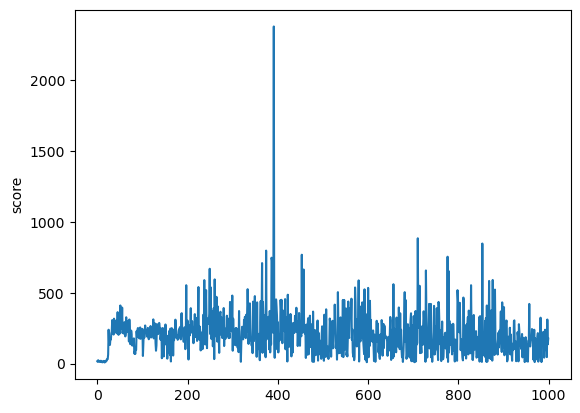

In [30]:
plt.plot(score_history)
plt.ylabel('score')
plt.show()